In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
#setting up the directory
import os
os.getcwd()
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

test_df.head()

#number of samples in train and test 
print(train_df.shape[0])
print(test_df.shape[0])

891
418


In [3]:
#perform data quality of missing values
#test missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Percentage of missing values in the data ===> featurewise percentages.
(train_df.isnull().sum()/train_df.shape[0])*100

#note : since feature cabin have 77% of missing values. so we better ignire this feature

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

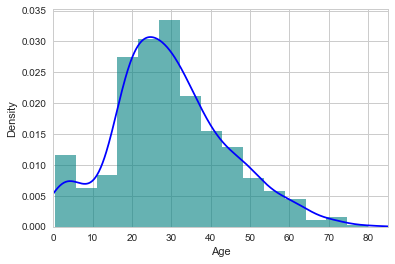

In [5]:
#from above code, we see 19% data is missing in age
#so plot the age data in histogram to see its distribution
#below code is for creating histograms with 15 bins
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='blue') #plot for the distribution curve
ax.set(xlabel='Age')
plt.xlim(0,85)  # to show X axis limits
plt.show()

#from the below plot we can see that major population of the age lies between 20 to 30 years old (curve peak)

In [6]:
#check the mean and median of the data
print('mean of age: %.2f' % train_df["Age"].mean(skipna=True)) #mean of the age of train set after skipping the null values
print('median of age: %.2f ' % train_df["Age"].median(skipna=True)) #median of age of train set

mean of age: 29.70
median of age: 28.00 


S    644
C    168
Q     77
Name: Embarked, dtype: int64


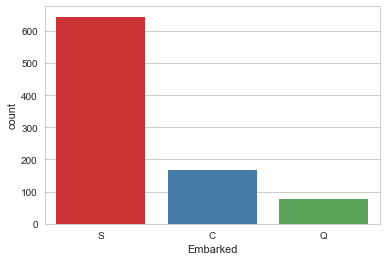

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

In [7]:
print(train_df['Embarked'].value_counts())

#use seaborn to plot a count comparision of the 'embarked' feature
sns.countplot(x='Embarked', data=train_df, palette='Set1')
plt.show()

(train_df["Embarked"].value_counts()/train_df.shape[0])*100  #so 72% of data of embared is Southhamptom ('S')

In [8]:
# OBSERVATION
#1) The age missing values will be replaced with median value 28
#2)The Embareked missing values will be replace by 'S' (south hampton)
#3)The  Cabin variable will be discarded as the missing values percentage is way too high

In [9]:
train_data = train_df.copy()  #take the copy of the data

train_data["Age"].fillna(train_df["Age"].median(skipna=True),inplace=True) # fill the NA's with median
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(),inplace=True) #fill the na with max occured value
train_data.drop('Cabin', axis=1 , inplace=True)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
#now check whether we have missing values after the imputation
train_data.isnull().sum() # we can see that there is no missing values now

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

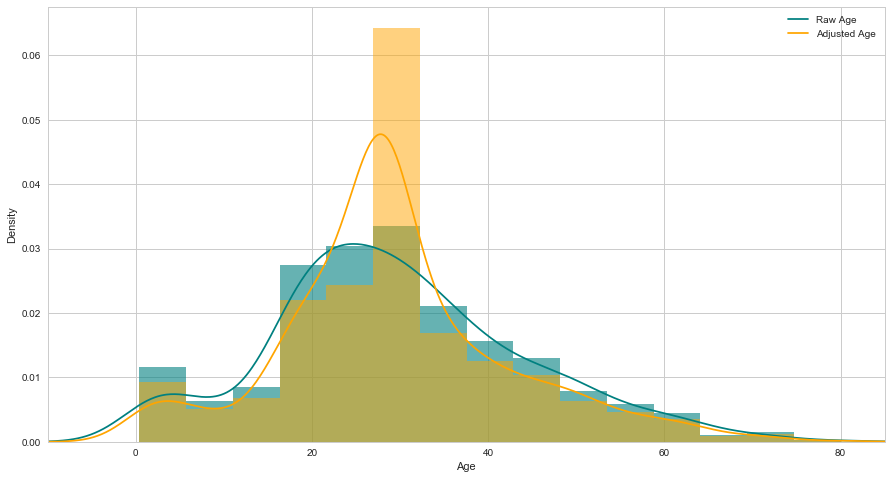

In [11]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [12]:
#create a categorical variable Travel alone from the Sibsp and parch feature
train_data['TravelAlone'] = np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)

#now drop the variable sibsp and parch variable
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

#train_data.head()


In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [14]:
#create categorical variable and drop some features
training = pd.get_dummies(train_data, columns=["Pclass","Sex","Embarked"])
training.drop('Sex_female', axis=1, inplace=True) #remove sex_female, as the sex has 2 category one feature is sufficient
training.drop('PassengerId', axis=1, inplace=True) #remove Passenger Id, considering ID will not contribute
training.drop('Name', axis=1, inplace=True)  #remove 'name' feature, considering name will not contribute
training.drop('Ticket', axis=1, inplace=True)  #remove this feature, considering ticket number will not contribute
final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,1,0,0,1


In [15]:
#now perform same operations on the test set too
test_df.isnull().sum()
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


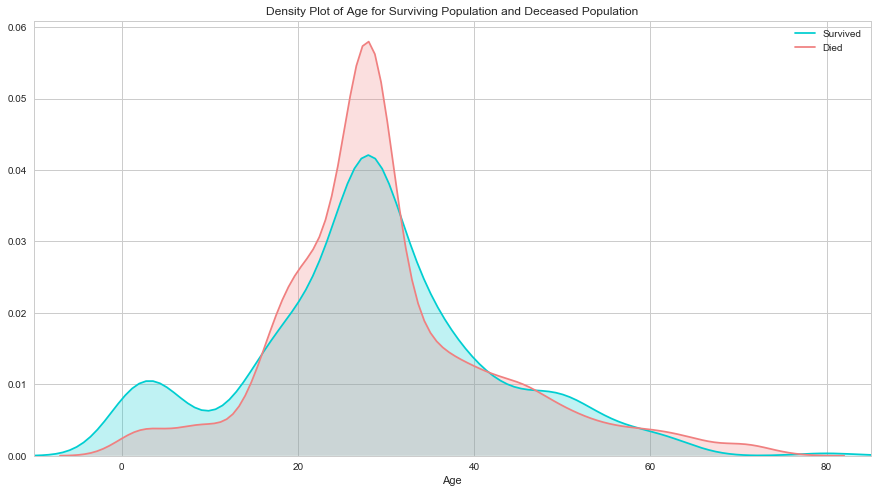

In [16]:
#Exploring the age - to check how age contribute whether the person has survivied or deceased
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

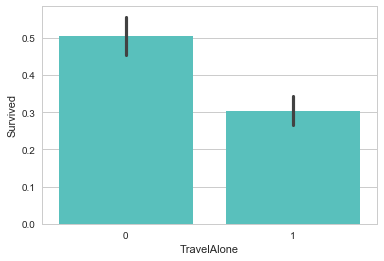

In [17]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"]

features = final_train[cols]
target = final_train['Survived']

#Build a logistic regression 
model = LogisticRegression()

#create RFE model and select 5 atrribute
rfe = RFE(model,5)
rfe = rfe.fit(features,target)

#summarise the selection of attributes
print('selected feature: %s' % list(features.columns[rfe.support_]))
print(rfe.ranking_) #ranking the features. Here we are considering rank 1 features.





selected feature: ['Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']
[3 4 2 1 1 1 1 1]


optimal number of features 7
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']


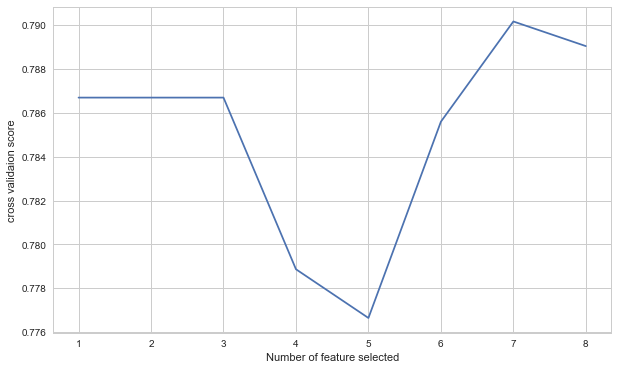

In [26]:
#to find the optimal feature to be used for consideration
#this can be optained by rfecv
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(),step=1,cv=10,scoring='accuracy') # 10 cross validation
rfecv.fit(features,target)

print("optimal number of features %d" % rfecv.n_features_)  #optimum number of features based on CV score
print('Selected features: %s' % list(features.columns[rfecv.support_]))

#we see the optimum number of features is 7 here

#to view the above representaion in a plot
plt.figure(figsize=(10,6))
plt.xlabel("Number of feature selected")
plt.ylabel("cross validaion score")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()
#from th eplot we see the CV score is high for the optimum number of feature 7

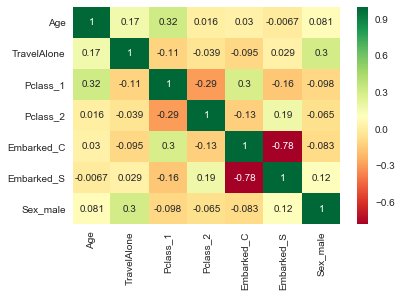

In [30]:
#to check the correlation between the features
selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C','Embarked_S', 'Sex_male']

select_corr_feat = final_train[selected_features]
sns.heatmap(select_corr_feat.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [37]:
####Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.metrics import classification_report,precision_recall_curve,roc_curve,auc,log_loss


var_train_feat = final_train[selected_features]
var_train_tar = final_train['Survived']

#now we are going to train and test split. 

X_train,X_test,Y_train,Y_test = train_test_split(var_train_feat,var_train_tar,test_size=0.2, random_state=2)

#Creating model - Logistic regression
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

ypred = log_reg.predict(X_test)

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(Y_test, y_pred_proba)
print('Train/Test split results:')

#print(log_reg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, ypred))
print(" accuracy is %2.3f" % accuracy_score(Y_test, ypred))

print(log_reg.__class__.__name__+" log_loss is %2.3f" % log_loss(Y_test, y_pred_proba))
print(log_reg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
 accuracy is 0.782
LogisticRegression log_loss is 0.506
LogisticRegression auc is 0.836
